In [35]:
#!pip install TikTokApi
#!pip install nest_asyncio
#import nest_asyncio
#nest_asyncio.apply()
#from TikTokApi import TikTokApi
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from io import StringIO
from matplotlib.ticker import PercentFormatter
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#n_videos = 5
#username = 'elpumajoseluisr'
#user_videos = TikTokApi.byUsername(username, count=n_videos)
base_tiktok = pd.read_excel('Base_tiktok_final.xlsx')
base_tiktok

Unnamed: 0  level        display_name  \
0              0      1        Richard Anze   
1              1      2               Julio   
2              2      2  Gustavo Daga Prado   
3              3      2               Bybro   
4              4      2                jfjf   
...          ...    ...                 ...   
1543        1543      1          josmendoza   
1544        1544      1            levigame   
1545        1545      1     gregorigomez575   
1546        1546      1           Argelis💎💗   
1547        1547      1   user4235116532998   

                                        username  \
0           https://www.tiktok.com/@richard.anze   
1         https://www.tiktok.com/@julio_florez21   
2            https://www.tiktok.com/@gustavodaga   
3         https://www.tiktok.com/@userf5aqznaxc0   
4              https://www.tiktok.com/@andy12_37   
...                                          ...   
1543        https://www.tiktok.com/@dyyj17w8v3hc   
1544           https://www.tiktok.com/@levi_game   
1545     https://www.tiktok.com/@gregorigomez575   
1546  https://www.tiktok.com/@argelisalvarado290   
1547           https://www.tiktok.com/@viajero76   

                                                comment       fecha  likes  \
0                            cn 500$ te vas en avion🤣🤣🤣   2022-9-18    251   
1                                            Y te queda   2022-9-23      6   
2                           jaja dirás con 1100 dólares  2022-10-13      3   
3                      pero no tienen pasaporte ni visa  2022-10-13     11   
4                             es difícil conseguir eso?  2022-10-14      0   
...                                                 ...         ...    ...   
1543  hola carito soy venezolano. puedo sacar la vis...   2022-7-17      0   
1544               que dicen los venezolanos a la migra   2022-7-17      0   
1545  buenas noche linda una pregunta colo ago para ...   2022-7-17      0   
1546                                                NaN   2022-7-17      0   
1547                                    hay DIOS santo😳   2022-7-17      0   

      replies                               Thread_author  
0           9        https://www.tiktok.com/@richard.anze  
1           0        https://www.tiktok.com/@richard.anze  
2           0        https://www.tiktok.com/@richard.anze  
3           0        https://www.tiktok.com/@richard.anze  
4           0        https://www.tiktok.com/@richard.anze  
...       ...                                         ...  
1543        1        https://www.tiktok.com/@dyyj17w8v3hc  
1544        1           https://www.tiktok.com/@levi_game  
1545        1     https://www.tiktok.com/@gregorigomez575  
1546        1  https://www.tiktok.com/@argelisalvarado290  
1547        1           https://www.tiktok.com/@viajero76  

[1548 rows x 9 columns]

In [37]:
base_tiktok.fillna('', inplace=True)

In [38]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
base_tiktok['Clean_Text']=base_tiktok['comment'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
base_tiktok['Clean_Text'] = base_tiktok['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))
base_tiktok['Clean_Text']= base_tiktok['Clean_Text'].str.replace('RT', '')
# Remover mayúsculas de inicio de texto
base_tiktok['Clean_Text'] = base_tiktok['Clean_Text'].map(lambda x: x.lower())
#Autores
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'@\w+', '', regex=True)
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].str.replace('rt', '')
#Espacios
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].str.strip()
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace('Document_No', '')
# Exclude stopwords 
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber','ver','no','ni','ago','buenas'])
#spanish_stopwords.extend(usuarios)
#spanish_stopwords.remove('no')
#spanish_stopwords.remove('ni')
base_tiktok['Clean_Text_no_stopwords'] = base_tiktok['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))
base_tiktok.fillna('',inplace=True)
base_tiktok.head(10)

Unnamed: 0  level        display_name  \
0           0      1        Richard Anze   
1           1      2               Julio   
2           2      2  Gustavo Daga Prado   
3           3      2               Bybro   
4           4      2                jfjf   
5           5      2               Nicky   
6           6      2  Francy Ramirez9603   
7           7      2     jhoanjimenez560   
8           8      2               Bybro   
9           9      2           Estefanía   

                                  username  \
0     https://www.tiktok.com/@richard.anze   
1   https://www.tiktok.com/@julio_florez21   
2      https://www.tiktok.com/@gustavodaga   
3   https://www.tiktok.com/@userf5aqznaxc0   
4        https://www.tiktok.com/@andy12_37   
5          https://www.tiktok.com/@nixrole   
6        https://www.tiktok.com/@apoloxiii   
7  https://www.tiktok.com/@jhoanjimenez560   
8   https://www.tiktok.com/@userf5aqznaxc0   
9    https://www.tiktok.com/@estefania2719   

                                             comment       fecha  likes  \
0                         cn 500$ te vas en avion🤣🤣🤣   2022-9-18    251   
1                                         Y te queda   2022-9-23      6   
2                        jaja dirás con 1100 dólares  2022-10-13      3   
3                   pero no tienen pasaporte ni visa  2022-10-13     11   
4                          es difícil conseguir eso?  2022-10-14      0   
5  Si pero pueden ir en avión hasta México y evit...  2022-10-14      2   
6  piden visa.. que sale super costosa y el pasap...  2022-10-15      1   
7         y si no te dan el permiso y no tienes visa   2022-10-8      7   
8  La visa a eeuu es complicada para cualquiera d...  2022-10-14      0   
9  Por lo que tengo entendido no se les permitía ...  2022-10-19      0   

   replies                         Thread_author  \
0        9  https://www.tiktok.com/@richard.anze   
1        0  https://www.tiktok.com/@richard.anze   
2        0  https://www.tiktok.com/@richard.anze   
3        0  https://www.tiktok.com/@richard.anze   
4        0  https://www.tiktok.com/@richard.anze   
5        0  https://www.tiktok.com/@richard.anze   
6        0  https://www.tiktok.com/@richard.anze   
7        0  https://www.tiktok.com/@richard.anze   
8        0  https://www.tiktok.com/@richard.anze   
9        0  https://www.tiktok.com/@richard.anze   

                                          Clean_Text  \
0                           cn 500$ te vas en avion🤣   
1                                         y te queda   
2                        jaja dirás con 1100 dólares   
3                     pero no tienen pasapoe ni visa   
4                           es difícil conseguir eso   
5  si pero pueden ir en avión hasta méxico y evit...   
6  piden visa que sale super costosa y el pasapoe...   
7         y si no te dan el permiso y no tienes visa   
8  la visa a eeuu es complicada para cualquiera d...   
9  por lo que tengo entendido no se les permitía ...   

                             Clean_Text_no_stopwords  
0                                 cn 500$ vas avion🤣  
1                                              queda  
2                            jaja dirás 1100 dólares  
3                                       pasapoe visa  
4                                  difícil conseguir  
5      si pueden ir avión méxico evitarse tema selva  
6     piden visa sale super costosa pasapoe ojo cara  
7                                si dan permiso visa  
8  visa eeuu complicada cualquiera latinoam perso...  
9     entendido permitía venezolanos ir avión méxico

In [39]:
series_a_str = str(base_tiktok["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')

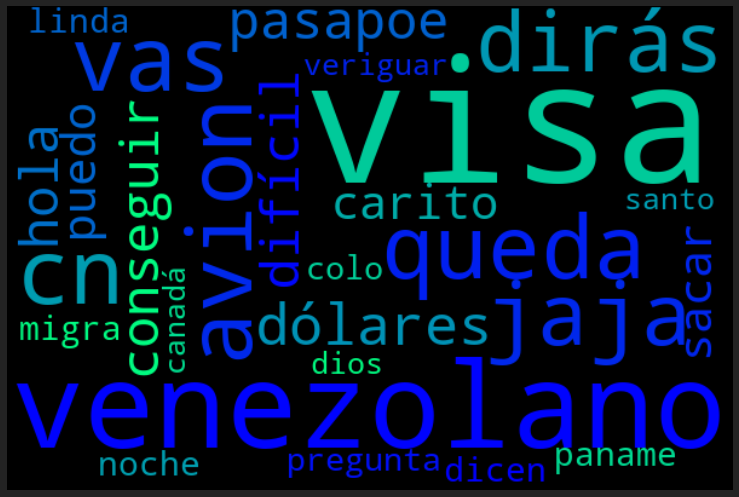

In [40]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [41]:
series_a_str = str(base_tiktok[base_tiktok["level"] == 1]['Clean_Text_no_stopwords'])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')

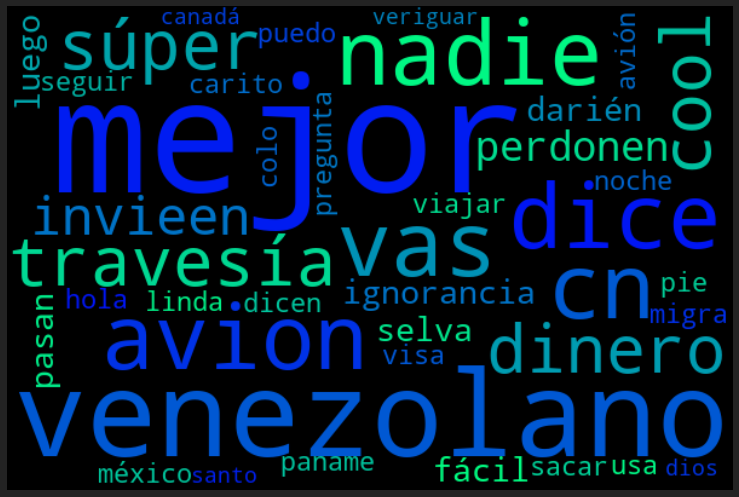

In [42]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [43]:
base_tiktok['fecha'] = base_tiktok['fecha'].apply(lambda a: pd.to_datetime(a).date()) 
base_tiktok['dia'] = base_tiktok['fecha'].apply(lambda a: pd.to_datetime(a).day)
base_tiktok['mes'] = base_tiktok['fecha'].apply(lambda a: pd.to_datetime(a).month)
base_tiktok['año'] = base_tiktok['fecha'].apply(lambda a: pd.to_datetime(a).year)
base_tiktok['mes_label'] = base_tiktok['mes'].apply(lambda a: pd.to_datetime(a).month)
for index, row in base_tiktok.iterrows():
    if base_tiktok.loc[index,'mes'] == 1:
        base_tiktok.loc[index,'mes_label'] = 'enero'
    elif base_tiktok.loc[index,'mes'] == 2:
        base_tiktok.loc[index,'mes_label'] = 'febrero'
    elif base_tiktok.loc[index,'mes'] == 3:
        base_tiktok.loc[index,'mes_label'] = 'marzo'
    elif base_tiktok.loc[index,'mes'] == 4:
        base_tiktok.loc[index,'mes_label'] = 'abril'
    elif base_tiktok.loc[index,'mes'] == 5:
        base_tiktok.loc[index,'mes_label'] = 'mayo'
    elif base_tiktok.loc[index,'mes'] == 6:
        base_tiktok.loc[index,'mes_label'] = 'junio'
    elif base_tiktok.loc[index,'mes'] == 7:
        base_tiktok.loc[index,'mes_label'] = 'julio'
    elif base_tiktok.loc[index,'mes'] == 8:
        base_tiktok.loc[index,'mes_label'] = 'agosto'
    elif base_tiktok.loc[index,'mes'] == 9:
        base_tiktok.loc[index,'mes_label'] = 'septiembre'
    elif base_tiktok.loc[index,'mes'] == 10:
        base_tiktok.loc[index,'mes_label'] = 'octubre'
    elif base_tiktok.loc[index,'mes'] == 11:
        base_tiktok.loc[index,'mes_label'] = 'noviembre'
    else:
        base_tiktok.loc[index,'mes_label'] = 'diciembre'
base_agrupada_fechas = base_tiktok.groupby('mes').sum()
base_agrupada_fechas.loc[7,'mes_label'] = 'julio'
base_agrupada_fechas.loc[8,'mes_label'] = 'agosto'
base_agrupada_fechas.loc[9,'mes_label'] = 'septiembre'
base_agrupada_fechas.loc[10,'mes_label'] = 'octubre'
base_agrupada_fechas.head(10)

Unnamed: 0  level  likes  replies    dia      año   mes_label
mes                                                               
7        353625    494   4393      729   8039   754206       julio
8        226552    247    548      469   3835   446862      agosto
9        441078    792    913     1362  10558  1292058  septiembre
10       176123    366     52      740   3084   636930     octubre

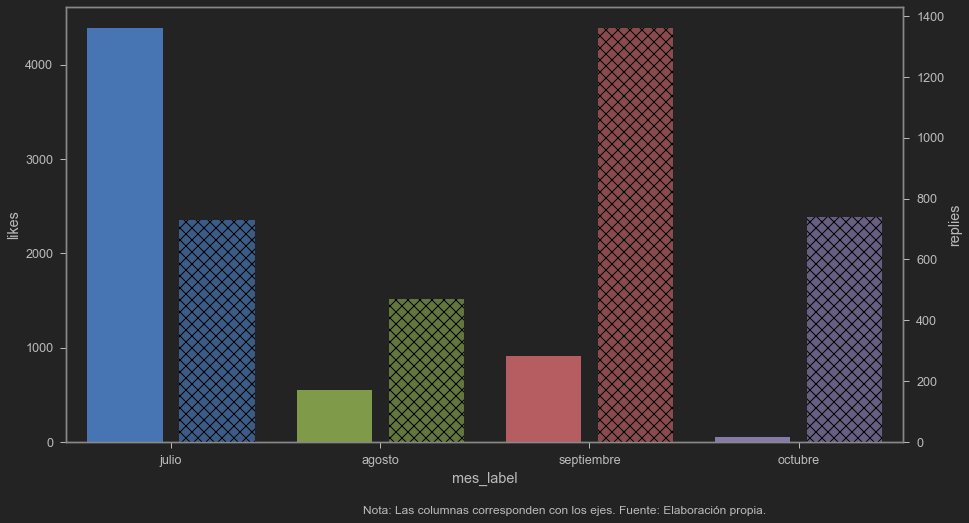

In [45]:
x_ = base_agrupada_fechas.columns[6]
y_ = base_agrupada_fechas.columns[2]
y_2 = base_agrupada_fechas.columns[3]
data1 = base_agrupada_fechas[[x_, y_]]
data2 = base_agrupada_fechas[[x_, y_2]]
plt.figure(figsize=(15,8))
ax = sns.barplot(x=x_,y=y_,data=data1)
width_scale = 0.45
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
#ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.figure.text(0.4, 0,'Nota: Las columnas corresponden con los ejes. Fuente: Elaboración propia.', fontsize=12)
ax.grid(False)
ax2 = ax.twinx()
sns.barplot(x=x_,y=y_2,data=data2,alpha=0.7,hatch='xx',ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1 - width_scale))
    bar.set_width(w *  width_scale)
#ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.grid(False)
plt.savefig("out.png") 
plt.show()

In [46]:
# Nubes de palabras de septiembre
series_a_str = str(base_tiktok[base_tiktok["mes_label"] == 'septiembre']['Clean_Text_no_stopwords'])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')

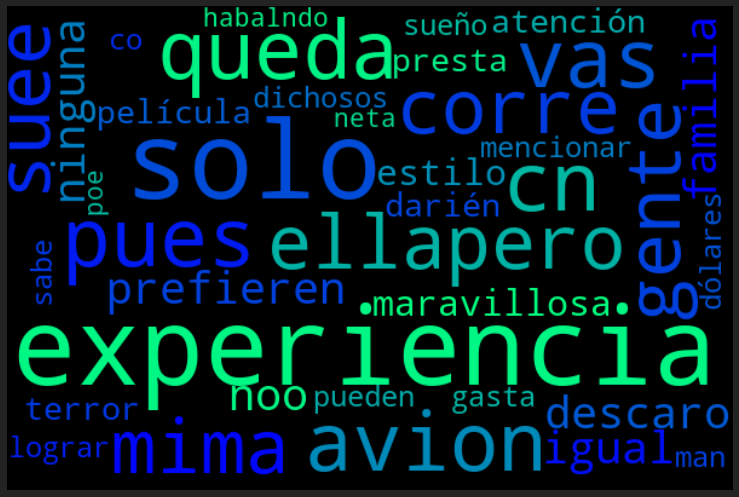

In [47]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [48]:
base_tiktok['Publicaciones'] = 1
base_agrupada_fechas = base_tiktok.groupby('fecha').sum()

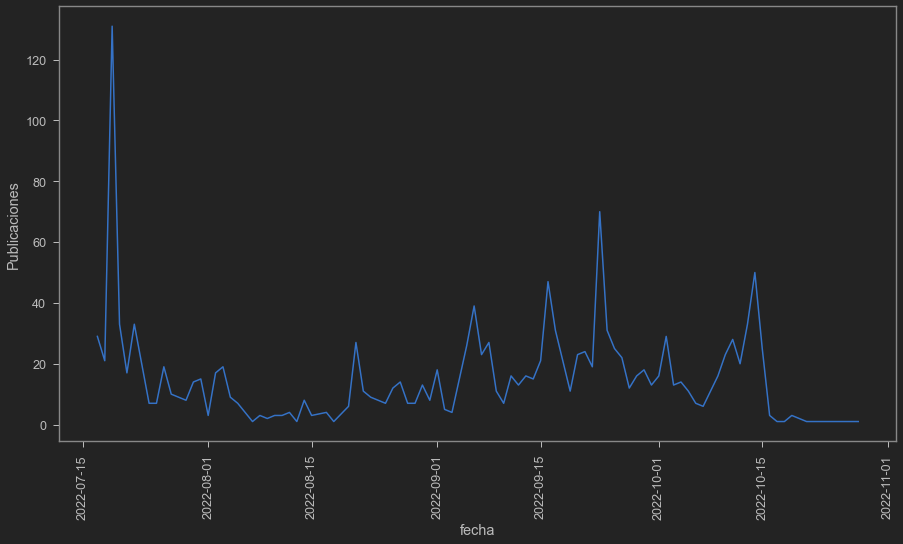

In [50]:
plt.figure(figsize=(15,8))
#base_tiktok.rename(inplace=True,  columns={"Menciones" : "Publicaciones"})
ax = sns.lineplot(x=base_agrupada_fechas.index,y=base_agrupada_fechas["Publicaciones"],data=base_agrupada_fechas)
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [51]:
base_agrupada_fechas.head(10)

Unnamed: 0  level  likes  replies   dia  mes     año  \
fecha                                                              
2022-07-17       21390     36   3127      232   493  203   58638   
2022-07-18       14547     30    120       41   378  147   42462   
2022-07-19      130714    177    704      231  2489  917  264882   
2022-07-20       18810     52    280       49   660  231   66726   
2022-07-21       14196     24     33       10   357  119   34374   
2022-07-22       30147     46     64       21   726  231   66726   
2022-07-23       26687     21      3       36   460  140   40440   
2022-07-24        5100     11      0        3   168   49   14154   
2022-07-25        8463      8      0        6   175   49   14154   
2022-07-26       21535     22     53       27   494  133   38418   

            Publicaciones  
fecha                      
2022-07-17             29  
2022-07-18             21  
2022-07-19            131  
2022-07-20             33  
2022-07-21             17  
2022-07-22             33  
2022-07-23             20  
2022-07-24              7  
2022-07-25              7  
2022-07-26             19